# Crear una Red Neuronal

In [41]:
import numpy as np 
import scipy as sc 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_circles

## Creamos el Dataset

In [42]:
# Documentacion del dataset
make_circles?

Signature:
make_circles(
    n_samples=100,
    *,
    shuffle=True,
    noise=None,
    random_state=None,
    factor=0.8,
)
Docstring:
Make a large circle containing a smaller circle in 2d.

A simple toy dataset to visualize clustering and classification
algorithms.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or two-element tuple, optional (default=100)
    If int, it is the total number of points generated.
    For odd numbers, the inner circle will have one point more than the
    outer circle.
    If two-element tuple, number of points in outer circle and inner
    circle.

shuffle : bool, optional (default=True)
    Whether to shuffle the samples.

noise : double or None (default=None)
    Standard deviation of Gaussian noise added to the data.

random_state : int, RandomState instance, default=None
    Determines random number generation for dataset shuffling and noise.
    Pass an int for reproducible output across multiple fu

## Creamos dos variables diferentes

## $n$ es la cantidad de objetos que vamos a analizar

## $p$ es la cantidad de clasificaciones de los objetos

In [43]:
n = 1000
p = 2

## Aqui visualizamos como el datset forma los dos circulos, poniendoles ruido para aumentar la dificultad

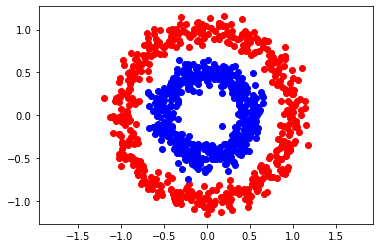

In [44]:
x,y = make_circles(n_samples=n, factor= 0.5, noise= 0.08)

y = y[:, np.newaxis]
y.shape
plt.scatter(x[y[:, 0]==0, 0 ], x[y[:, 0] == 0, 1], c = 'red')
plt.scatter(x[y[:, 0]==1, 0 ], x[y[:, 0] == 1, 1], c = 'blue')
plt.axis("equal")
plt.show()

## Clase de la capa de la Red

In [45]:
class neural_layer():
    def __init__(self,n_conexiones, n_neuronas, activacion_func):

        self.activacion_func = activacion_func
        self.b = np.random.rand(1, n_neuronas) * 2 -1
        self.w = np.random.rand(n_conexiones, n_neuronas) * 2 - 1
        


## Funciones de Activación

In [46]:
sigmoide = (lambda x:1 / (1+np.e ** -x),
            lambda x: x*(1-x))

def derivada_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (lambda x:  np.maximum(0,x),
        lambda x: derivada_relu(x))




# Arquitectura o Topologia de la Red Neuronal

In [47]:

#l0 = neural_layer(p,4, sigmoide)
#l1 = neural_layer(4,8,sigmoide)
#... 
topologia = [p,4,8,1]
def create_neural(topologia, activacion_func):

    neural_net = []

    for l, layer in enumerate(topologia[:-1]):
       neural_net.append(neural_layer(topologia[l],topologia[l+1],activacion_func))
    return neural_net


In [48]:
create_neural(topologia,sigmoide)

# Entrenamiento de la Red Neuronal

In [49]:
topologia = [p,4,8,4,1]
neural_network = create_neural(topologia,sigmoide)

# Error cuadratico medio
l2_cost = (lambda Yp, Yr,:np.mean((Yp-Yr)**2),
            lambda Yp, Yr: (Yp-Yr))

def train(neural_network, x, y, l2_cost, lr = 0.5, train = True):
    # Forward pass
    out = [(None,x)]
    for l, layer in enumerate(neural_network):
        z = out[-1][1] @ neural_network[l].w + neural_network[l].b
        a = neural_network[l].activacion_func[0](z) 

        out.append((z,a))
   # print(l2_cost[0]( out[-1][1],y))

    if train == True:
        # Backward pass
        deltas = []

        for l in reversed(range(0, len(neural_network))):

            z = out[l+1][0]
            a = out[l+1][1]
            #print(a.shape)
            if l == len(neural_network) - 1:
                # Calcular delta ultima capa
                deltas.insert(0,l2_cost[1](a, y)* neural_network[l].activacion_func[1](a))
                #print(deltas)
            else:
                # Calcular delta respescto a capa previa
                deltas.insert(0,deltas[0]@ _w.T * neural_network[l].activacion_func[1](a))
            
            _w = neural_network[l].w

            # Gradient descent
            neural_network[l].b = neural_network[l].b - np.mean(deltas[0], axis=0, keepdims = True) *lr
            neural_network[l].w = neural_network[l].w - out[l][1].T @ deltas[0]  * lr
    return out[-1][1]





train(neural_network,x ,y , l2_cost, 0.5)
print('')

# Implementación de la Red Neuronal 

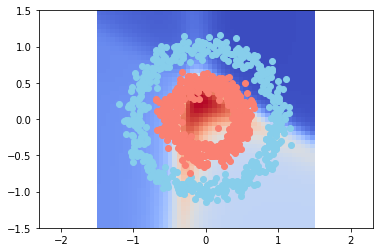

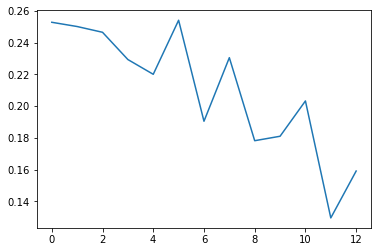

KeyboardInterrupt: 

In [50]:
import time
from IPython.display import clear_output


topologia = [p,4,8,4,1]
neural_network = create_neural(topologia,sigmoide)

loss = []

for i in range(1000):
    # Entrenamos a la red
    pY = train(neural_network,x,y, l2_cost, lr = 0.1)

    if i % 25 == 0:
        loss.append(l2_cost[0](pY,y))

        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _y =np.zeros((res, res))

        for i0,x0 in enumerate(_x0):
            for i1, x1  in enumerate(_x1):
                _y[i0,i1] = train( neural_network, np.array([[x0,x1]]), y, l2_cost, train=False)[0][0]
        plt.pcolormesh(_x0,_x1,_y, cmap ="coolwarm")
        plt.axis('equal')

        plt.scatter(x[y[:, 0]== 0, 0], x[y[:,0]==0,1],c='skyblue')
        plt.scatter(x[y[:, 0]== 1, 0], x[y[:,0]==1,1],c='salmon')

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)

In [51]:
class neural_layer():
    def __init__(self,n_conexiones, n_neuronas, activacion_func):

        self.activacion_func = activacion_func
        self.b = np.random.rand(1, n_neuronas) * 2 -1
        self.w = np.random.rand(n_conexiones, n_neuronas) * 2 - 1
    
    
    def create_neural(topologia, activacion_func):

        neural_net = []

        for l, layer in enumerate(topologia[:-1]):
            neural_net.append(neural_layer(topologia[l],topologia[l+1],activacion_func))
        return neural_net

   
    

    # Error cuadratico medio
    l2_cost = (lambda Yp, Yr,:np.mean((Yp-Yr)**2),
                lambda Yp, Yr: (Yp-Yr))

    def train(neural_network, x, y, l2_cost, lr = 0.5, train = True):
        # Forward pass
        out = [(None,x)]
        for l, layer in enumerate(neural_network):
            z = out[-1][1] @ neural_network[l].w + neural_network[l].b
            a = neural_network[l].activacion_func[0](z) 

            out.append((z,a))
    # print(l2_cost[0]( out[-1][1],y))

        if train == True:
            # Backward pass
            deltas = []

            for l in reversed(range(0, len(neural_network))):

                z = out[l+1][0]
                a = out[l+1][1]
                #print(a.shape)
                if l == len(neural_network) - 1:
                    # Calcular delta ultima capa
                    deltas.insert(0,l2_cost[1](a, y)* neural_network[l].activacion_func[1](a))
                    #print(deltas)
                else:
                    # Calcular delta respescto a capa previa
                    deltas.insert(0,deltas[0]@ _w.T * neural_network[l].activacion_func[1](a))
                
                _w = neural_network[l].w

                # Gradient descent
                neural_network[l].b = neural_network[l].b - np.mean(deltas[0], axis=0, keepdims = True) *lr
                neural_network[l].w = neural_network[l].w - out[l][1].T @ deltas[0]  * lr
        return out[-1][1]

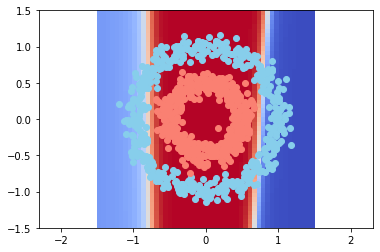

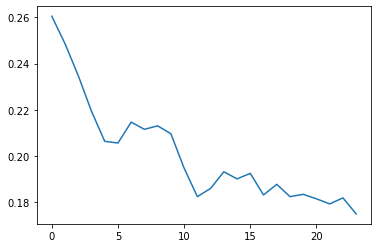

In [53]:
from sklearn.datasets import make_circles
import time
from IPython.display import clear_output


topologia = [p,4,8,4,1]
neural_network = neural_layer.create_neural(topologia,sigmoide)

loss = []

for i in range(600):
    # Entrenamos a la red
    pY =neural_layer.train(neural_network,x,y, l2_cost, lr = 0.1)

    if i % 25 == 0:
        loss.append(l2_cost[0](pY,y))

        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _y =np.zeros((res, res))

        for i0,x0 in enumerate(_x0):
            for i1, x1  in enumerate(_x1):
                _y[i0,i1] = neural_layer.train( neural_network, np.array([[x0,x1]]), y, l2_cost, train=False)[0][0]
        plt.pcolormesh(_x0,_x1,_y, cmap ="coolwarm")
        plt.axis('equal')

        plt.scatter(x[y[:, 0]== 0, 0], x[y[:,0]==0,1],c='skyblue')
        plt.scatter(x[y[:, 0]== 1, 0], x[y[:,0]==1,1],c='salmon')

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)